In [5]:
#Importing necessary functions
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv("HighestGrossers.csv")

In [56]:
#Displays first five rows of data
df.head(27)

,YEAR,MOVIE,GENRE,MPAA RATING,DISTRIBUTOR,TOTAL BOX OFFICE FOR YEAR,TOTAL BOX OFFICE IN 2019 DOLLARS,TICKETS SOLD
0,1995,Batman Forever,Drama,PG-13,Warner Bros.,184031112,387552978,42306002
1,1996,Independence Day,Adventure,PG-13,20th Century Fox,306169255,634504608,69269062
2,1997,Men in Black,Adventure,PG-13,Sony Pictures,250650052,500207943,54607854
3,1998,Titanic,Adventure,PG-13,Paramount Pictures,443319081,865842808,94524324
4,1999,Star Wars Ep. I: The Phantom Menace,Adventure,PG,20th Century Fox,430443350,776153749,84732942
5,2000,How the Grinch Stole Christmas,Adventure,PG,Universal,253367455,430583644,47006948
6,2001,Harry Potter and the Sorcerer’s Stone,Adventure,PG,Warner Bros.,300404434,486166890,53074988
7,2002,Spider-Man,Adventure,PG-13,Sony Pictures,403706375,636480273,69484746
8,2003,Finding Nemo,Adventure,G,Walt Disney,339714367,516050346,56337374
9,2004,Shrek 2,Adventure,PG,Dreamworks SKG,441226247,650826473,71050925


In [31]:
#Changes year and tickets sold to integer type from float and prints out the datatypes of all variables
df["YEAR"] = df["YEAR"].astype(int)
df["TICKETS SOLD"] = df["TICKETS SOLD"].astype(int)
print(df.dtypes)

YEAR                                 int32
MOVIE                               object
GENRE                               object
MPAA RATING                         object
DISTRIBUTOR                         object
TOTAL BOX OFFICE FOR YEAR            int64
TOTAL BOX OFFICE IN 2019 DOLLARS     int64
TICKETS SOLD                         int32
dtype: object


In [32]:
#Label encoding for MPAA Rating to convert it from a categorical variable to a numerical one (where G is 0 and R is 3)
rating_map = {"G":0, "PG": 1, "PG-13": 2, "R":3}
df["MPAA RATING"] = df["MPAA RATING"].map(rating_map)
print(df["MPAA RATING"])

0     2
1     2
2     2
3     2
4     1
5     1
6     1
7     2
8     0
9     1
10    2
11    2
12    2
13    2
14    2
15    0
16    2
17    2
18    2
19    2
20    2
21    1
22    2
23    2
24    2
25    3
26    2
Name: MPAA RATING, dtype: int64


In [8]:
#Summary statistics of dataset
df.describe()

,YEAR,MPAA RATING,TOTAL BOX OFFICE FOR YEAR,TOTAL BOX OFFICE IN 2019 DOLLARS,TICKETS SOLD
count,27.000000,27.000000,2.700000e+01,2.700000e+01,2.700000e+01
mean,2008.000000,1.703704,4.192772e+08,5.537181e+08,6.044945e+07
std,7.937254,0.668800,1.631468e+08,1.699845e+08,1.855738e+07
min,1995.000000,0.000000,1.840311e+08,2.044178e+08,2.231636e+07
25%,2001.500000,1.500000,3.196123e+08,4.544314e+08,4.961042e+07
50%,2008.000000,2.000000,4.037064e+08,5.160503e+08,5.633737e+07
75%,2014.500000,2.000000,4.648073e+08,6.641301e+08,7.250329e+07
max,2021.000000,3.000000,8.583730e+08,8.658428e+08,9.452432e+07


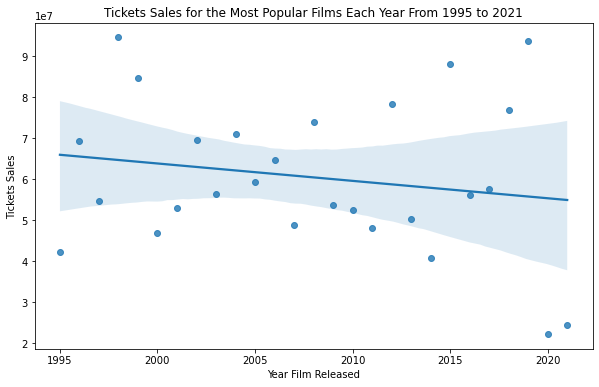

In [9]:
#Line Graph of ticket sales vs the year the film released
plt.figure(figsize=(10,6))
sns.regplot(x="YEAR", y="TICKETS SOLD", data=df)
plt.title("Tickets Sales for the Most Popular Films Each Year From 1995 to 2021")
plt.xlabel("Year Film Released")
plt.ylabel("Tickets Sales")
plt.show()

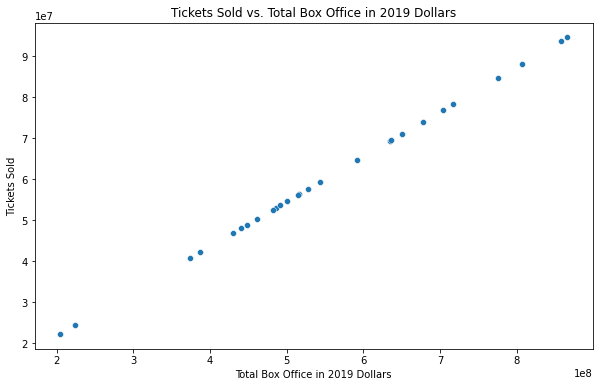

In [10]:
#Line Graph of tickets sold vs. total box office in 2019 dollars (accounting for inflation)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TOTAL BOX OFFICE IN 2019 DOLLARS', y='TICKETS SOLD', data=df)
plt.title('Tickets Sold vs. Total Box Office in 2019 Dollars')
plt.xlabel('Total Box Office in 2019 Dollars')
plt.ylabel('Tickets Sold')
plt.show()
#Shows almost a fully linear relationship

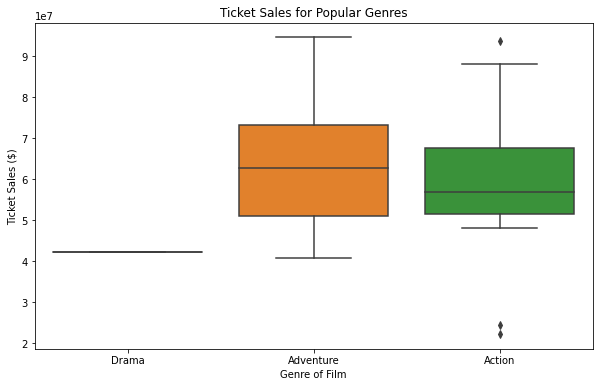

In [11]:
#Histogram of Ticket Sales vs. the Genre of Film
plt.figure(figsize=(10,6))
sns.boxplot(x="GENRE", y="TICKETS SOLD", data=df)
plt.xlabel("Genre of Film")
plt.ylabel("Ticket Sales ($)")
plt.title("Ticket Sales for Popular Genres")
plt.show()

Text(0.5, 1.0, 'Ticket Sales for Popular Film Distributors')

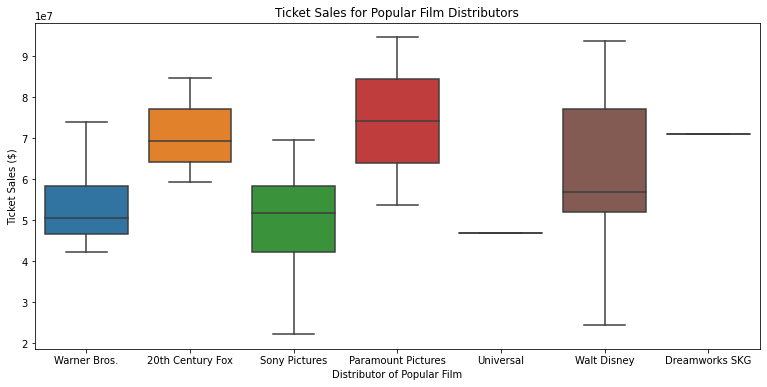

In [12]:
#Histogram of Ticket Sales vs. Distributor of Popular Film
plt.figure(figsize=(13,6))
sns.boxplot(x="DISTRIBUTOR", y="TICKETS SOLD", data=df)
plt.xlabel("Distributor of Popular Film")
plt.ylabel("Ticket Sales ($)")
plt.title("Ticket Sales for Popular Film Distributors")

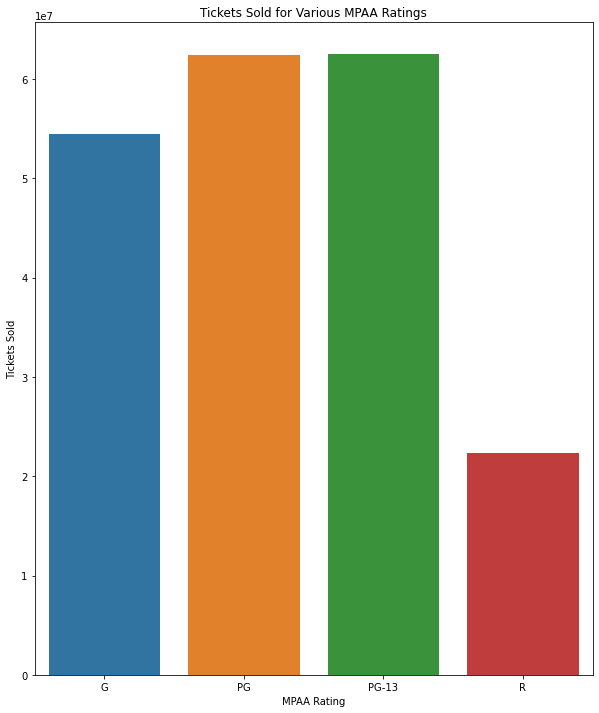

In [57]:
#Bar graph of Tickets Sold for Various MPAA Ratings
df_rating = df.groupby("MPAA RATING", as_index=False)["TICKETS SOLD"].mean()
plt.figure(figsize=(10,12))
sns.barplot(data=df_rating, x="MPAA RATING", y="TICKETS SOLD")
plt.xlabel("MPAA Rating")
plt.ylabel("Tickets Sold")
plt.title("Tickets Sold for Various MPAA Ratings")
plt.show()

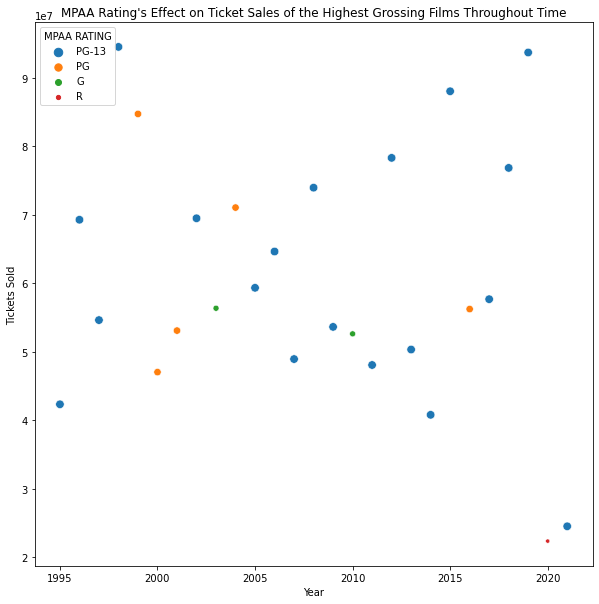

In [58]:
#Bubble Plot depicting MPAA Rating's Effect on Ticket Sales of Highest Grossing Films Throughout Time
df.groupby("YEAR")["TICKETS SOLD"].mean()
size = df["MPAA RATING"]
plt.figure(figsize=(10,10))
sns.scatterplot(data=df, x="YEAR", y="TICKETS SOLD", size=size, hue="MPAA RATING")
plt.xlabel("Year")
plt.ylabel("Tickets Sold")
plt.title("MPAA Rating's Effect on Ticket Sales of the Highest Grossing Films Throughout Time")
plt.show()

In [13]:
#Correlations between all predictor and target variables and the Tickets Sold variable
df.corr()["TICKETS SOLD"].sort_values()

YEAR                               -0.181127
MPAA RATING                        -0.074515
TOTAL BOX OFFICE FOR YEAR           0.765273
TOTAL BOX OFFICE IN 2019 DOLLARS    1.000000
TICKETS SOLD                        1.000000
Name: TICKETS SOLD, dtype: float64

In [14]:
#Linear Regression model is fit to this dataset and the R^2 value of this model is displayed
x = df[["YEAR", "MPAA RATING", "TOTAL BOX OFFICE IN 2019 DOLLARS"]]
y = df["TICKETS SOLD"]
lr = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)
lr.fit(x_train, y_train)
r2_score_lr = lr.score(x_test, y_test)
y_pred_lr = lr.predict(x_test)
root_mean_squared_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
print("Linear Regression: ")
print("The R squared value is ", r2_score_lr, "and the root mean squared error is ", root_mean_squared_lr)

Linear Regression: 
The R squared value is  0.9999999916214821 and the root mean squared error is  1091.678471624138


C:\Users\jpanc\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [15]:
#Coefficients from linear regression equation for each of the predictor variables is displayed
print("Coefficients: ", lr.coef_)

Coefficients:  [-0.00465089  0.02133498  0.10917031]


In [29]:
#Polynomial Regression model (degree of 2) fitting dataset using a Pipeline programming object
pipeline = Pipeline([("scale", StandardScaler()), ("polynomial", PolynomialFeatures(degree=2)), ("model", LinearRegression())])
pipeline.fit(x_train, y_train)
y_pred_poly = pipeline.predict(x_test)
rmse_poly = mean_squared_error(y_test, y_pred_poly, squared=False)
print("Polynomial Regression (order of 2):")
print("The R squared value is ", pipeline.score(x_test,y_test), "and the root mean squared error is ", rmse_poly)

Polynomial Regression (order of 2):
The R squared value is  0.9999999916224385 and the root mean squared error is  1091.6161661432484


C:\Users\jpanc\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [16]:
#The optimal alpha value for a Ridge Regression Model is found using the GridSearchCV() method
parameters1 = [{"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10]}]
ridge = Ridge()
Grid1 = GridSearchCV(ridge, parameters1, cv=5)
Grid1.fit(x_train, y_train)
best = Grid1.best_estimator_
print(best)
print(best.score(x_test, y_test))

Ridge(alpha=0.0001)
0.9999999916214821


C:\Users\jpanc\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.114e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\jpanc\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=3.82865e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\jpanc\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.34747e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\jpanc\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.01546e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Use

In [17]:
#Ridge Regression model is fit to this dataset and the R^2 value of this model is displayed
ridge1 = Ridge(alpha=0.001)
ridge1.fit(x_train, y_train)
y_pred_ridge = ridge1.predict(x_test)
ridge_rmse = mean_squared_error(y_test, y_pred_ridge, squared=False)
ridge_r2 = ridge1.score(x_test, y_test)
print("Ridge Regression:")
print("The R squared value is ", ridge_r2, "and the  Root Mean Squared Error is ", ridge_rmse)

Ridge Regression:
The R squared value is  0.9999999916214821 and the  Root Mean Squared Error is  1091.678470948548


C:\Users\jpanc\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=9.43836e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\jpanc\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [18]:
#Lasso Regression model is fit to this dataset and the R^2 value of this model is displayed
lasso = Lasso()
lasso.fit(x_train, y_train)
y_pred_lasso = lasso.predict(x_test)
r2_score_lasso = lasso.score(x_test, y_test)
rmse_lasso = mean_squared_error(y_test, y_pred_lasso, squared=False)
print("Lasso Regression: ")
print("The R squared value is ", r2_score_lasso, "and the root mean squared error is ", rmse_lasso)

Lasso Regression: 
The R squared value is  0.9999999916218745 and the root mean squared error is  1091.6529071631687


C:\Users\jpanc\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


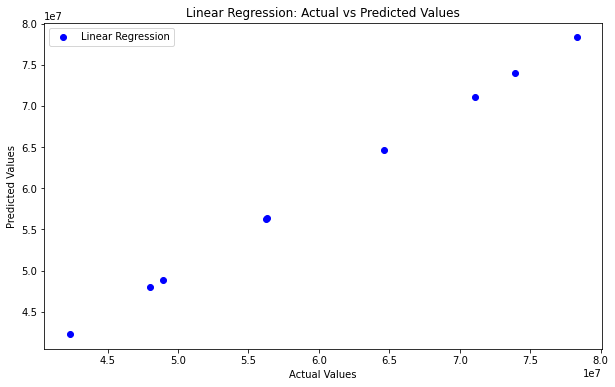

In [19]:
#Graph of Actual Values vs. Predicted Values (generated by the Linear Regression Model)
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_lr, color="blue", label="Linear Regression")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression: Actual vs Predicted Values")
plt.legend()
plt.show()

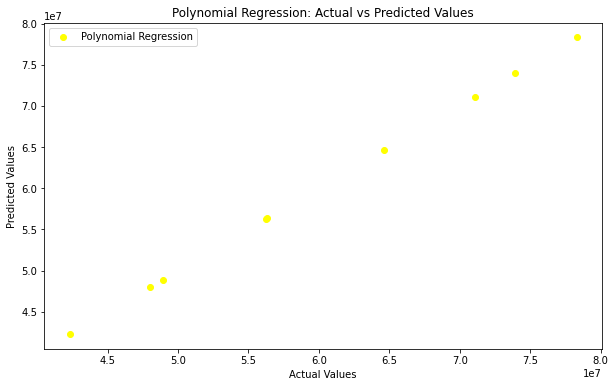

In [31]:
#Graph of Actual vs. Predicted Values (generated by the Lasso Regression model)
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_poly, color="yellow", label="Polynomial Regression")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Polynomial Regression: Actual vs Predicted Values")
plt.legend()
plt.show()

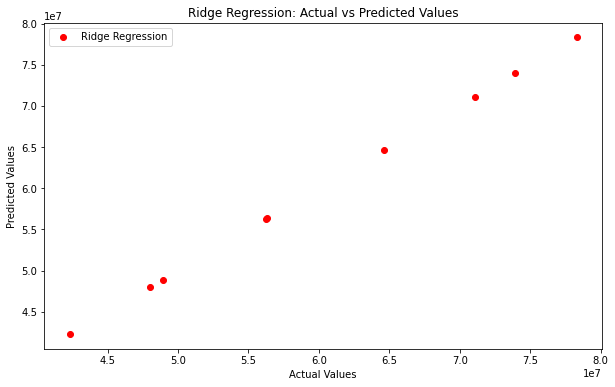

In [20]:
#Graph of Actual vs. Predicted Values (generated by the Ridge Regression model)
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_ridge, color="red", label="Ridge Regression")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Ridge Regression: Actual vs Predicted Values")
plt.legend()
plt.show()

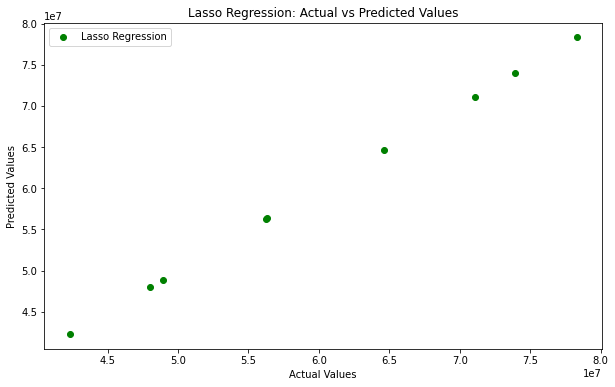

In [21]:
#Graph of Actual vs. Predicted Values (generated by the Lasso Regression model)
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_lasso, color="green", label="Lasso Regression")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Lasso Regression: Actual vs Predicted Values")
plt.legend()
plt.show()

In [22]:
#Finds r-squared values for various orders using the PolynomialFeatures() method
Rsqu_test = []
order = [1,2,3,4]

for n in order:
    pr = PolynomialFeatures(degree=n)
    x_train_pr = pr.fit_transform(x_train)
    x_test_pr = pr.fit_transform(x_test)
    lr.fit(x_train_pr, y_train)
    Rsqu_test.append(lr.score(x_test_pr, y_test))

Text(0.5, 1.0, 'R-squared values using test data')

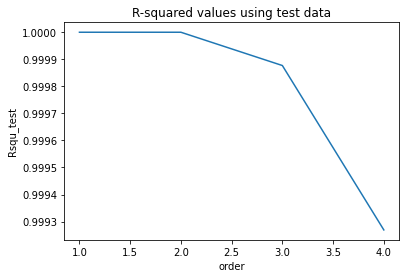

In [23]:
#Graph of R-squared values for various orders
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.plot(order, Rsqu_test)
plt.xlabel("order")
plt.ylabel("Rsqu_test")
plt.title("R-squared values using test data")

In [25]:
#Cross validation is conducted on linear, ridge, and lasso regression models and the cross validation scores (in terms of R^2) are displayed
Rcross_lr = cross_val_score(lr, df[["YEAR", "MPAA RATING", "TOTAL BOX OFFICE IN 2019 DOLLARS"]], df["TICKETS SOLD"], cv=5)
print("The mean cross val score for Linear Regression is ", Rcross_lr.mean(), "and the standard deviation is ", Rcross_lr.std())
Rcross_ridge = cross_val_score(ridge1, df[["YEAR", "MPAA RATING", "TOTAL BOX OFFICE IN 2019 DOLLARS"]], df["TICKETS SOLD"], cv=5)
print("The mean cross val score for Ridge Regression is ", Rcross_ridge.mean(), "and the standard deviation is ", Rcross_ridge.std())
Rcross_lasso = cross_val_score(lasso, df[["YEAR", "MPAA RATING", "TOTAL BOX OFFICE IN 2019 DOLLARS"]], df["TICKETS SOLD"], cv=5)
print("The mean cross val score for Lasso Regression is ", Rcross_lasso.mean(), "and the standard deviation is ", Rcross_lasso.std())
Rcross_poly = cross_val_score(pipeline, df[["YEAR", "MPAA RATING", "TOTAL BOX OFFICE IN 2019 DOLLARS"]], df["TICKETS SOLD"], cv=5)
print("The mean cross val score for Polynomial Regression is ", Rcross_poly.mean(), "and the standard deviation is ", Rcross_poly.std())

The mean cross val score for Linear Regression is  0.9999999983731318 and the standard deviation is  1.7264707903790162e-09
The mean cross val score for Ridge Regression is  0.9999999983731428 and the standard deviation is  1.7264861269116662e-09
The mean cross val score for Lasso Regression is  0.9999999983740638 and the standard deviation is  1.7278451752782752e-09
The mean cross val score for Polynomial Regression is  0.9999999981326655 and the standard deviation is  1.5997462122533513e-09


C:\Users\jpanc\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.44175e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\jpanc\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=9.29297e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\jpanc\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.0192e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\jpanc\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.54986e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Us